<a href="https://colab.research.google.com/github/NNaveenKV2348535/NNaveenKV2348535/blob/main/2348535_ML_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn.linear_model import LogisticRegression

# **Importing the dataset**

In [2]:
# Load the employee dataset into a pandas DataFrame
# Assuming you have the dataset in a CSV file named 'employee_dataset.csv'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Datasets/employee_data (1) 2.csv')
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

In [4]:
# Handle missing values if any (for demonstration, we'll assume imputing with mean for numerical columns)
df.fillna(df.mean(), inplace=True)

<ipython-input-4-60ff8d2e6709>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [5]:
# Check data types and convert if needed
# Assuming tenure is in months and hence is a numerical value
df['tenure'] = pd.to_numeric(df['tenure'])

In [7]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

   avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              1.0         0.932868           4   
1              232      support              1.0         0.718477           3   
2              184        sales              1.0         0.788830           3   
3              206        sales              1.0         0.575688           4   
4              249        sales              1.0         0.845217           3   

   recently_promoted  salary  satisfaction    status  tenure  
0                1.0     low      0.829896      Left     5.0  
1                1.0     low      0.834544  Employed     2.0  
2                1.0  medium      0.834988  Employed     3.0  
3                1.0     low      0.424764  Employed     2.0  
4                1.0     low      0.779043  Employed     3.0  


# **1. Data Exploration and Visualization**

## **Exploratory Data Analysis (EDA)**

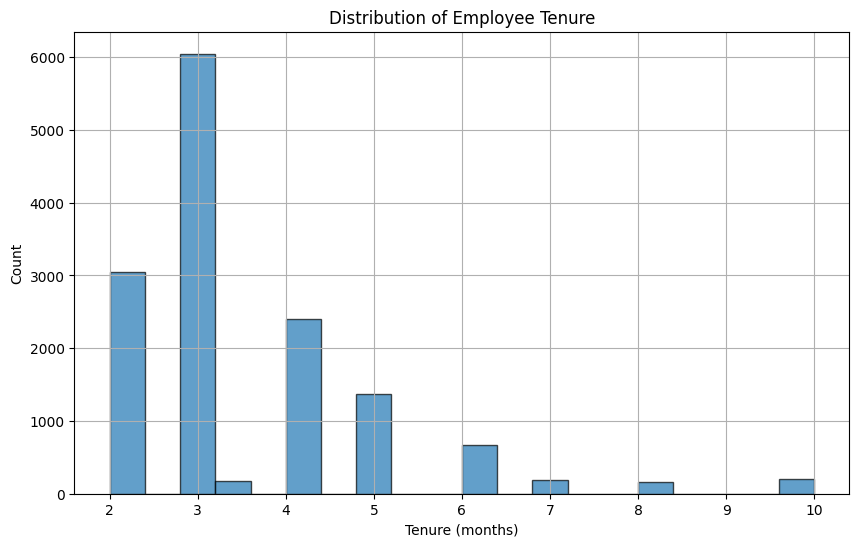

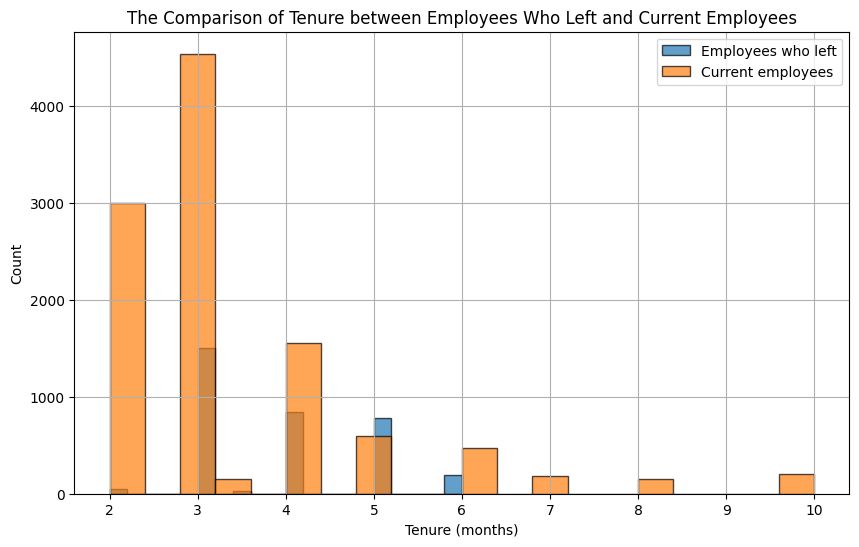

In [8]:
summary_stats = df.describe()

# Visualize the distribution of employee tenure using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['tenure'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.title('Distribution of Employee Tenure')
plt.grid(True)
plt.show()

# Compare tenure trends between employees who have left and those still employed
left_employees = df[df['status'] == 'Left']
current_employees = df[df['status'] == 'Employed']

plt.figure(figsize=(10, 6))
plt.hist(left_employees['tenure'], bins=20, edgecolor='black', alpha=0.7, label='Employees who left')
plt.hist(current_employees['tenure'], bins=20, edgecolor='black', alpha=0.7, label='Current employees')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.title('The Comparison of Tenure between Employees Who Left and Current Employees')
plt.legend()
plt.grid(True)
plt.show()


## **Observations:**
There is a negative correlation between employee tenure and the likelihood of leaving the company. Employees with less tenure are more likely to leave the company than employees with more tenure.

## **Boxplot**

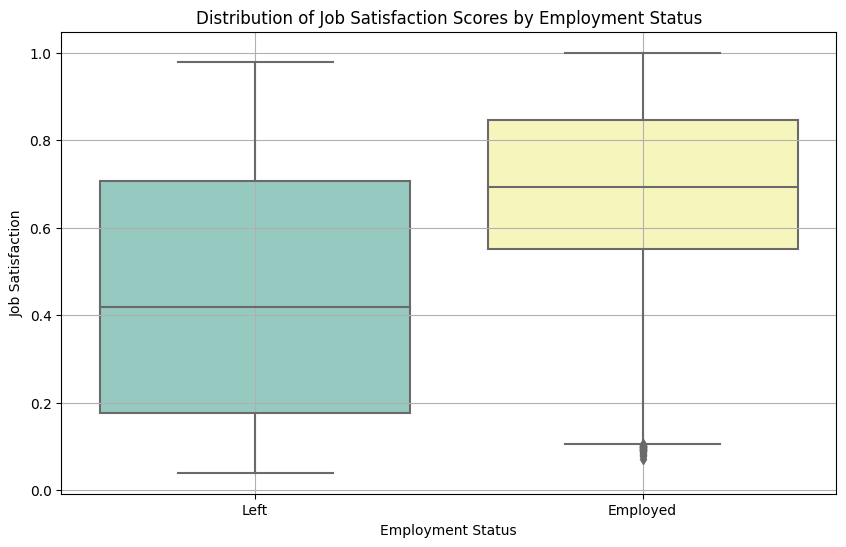

In [9]:
# Create a boxplot to examine the distribution of job satisfaction scores among employees who left and those who are still employed
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='satisfaction', data=df, palette='Set3')
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction')
plt.title('Distribution of Job Satisfaction Scores by Employment Status')
plt.grid(True)
plt.show()


## **Observations:**
The job satisfaction is a factor in employee turnover. Employees with lower job satisfaction scores are more likely to leave the company.

## **Pie chart**

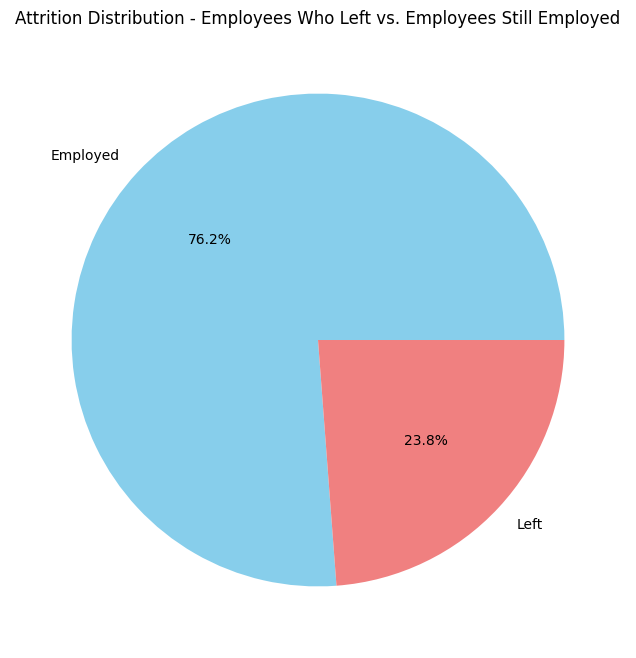

Percentage of employees who have left the company: 23.81%


In [10]:
# Calculate the count of employees who left and who are still employed
attrition_counts = df['status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Attrition Distribution - Employees Who Left vs. Employees Still Employed')
plt.show()

# Calculate the percentage of employees who have left the company
percentage_left = (attrition_counts['Left'] / attrition_counts.sum()) * 100
print(f'Percentage of employees who have left the company: {percentage_left:.2f}%')


## **Scatter Plot**

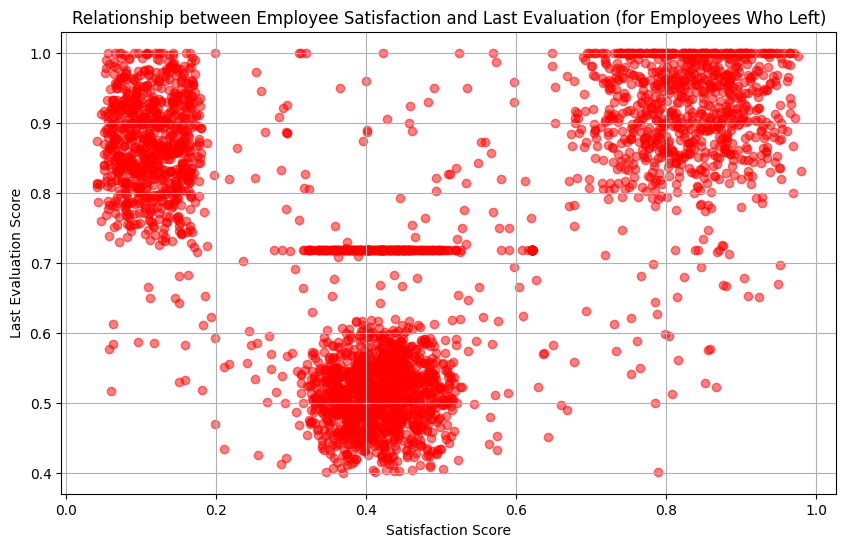

Correlation coefficient between satisfaction and last evaluation for employees who left: 0.18


In [11]:
# Filter data for employees who left
left_employees = df[df['status'] == 'Left']

# Create a scatter plot to explore the relationship between satisfaction and last evaluation
plt.figure(figsize=(10, 6))
plt.scatter(left_employees['satisfaction'], left_employees['last_evaluation'], alpha=0.5, color='red')
plt.xlabel('Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Relationship between Employee Satisfaction and Last Evaluation (for Employees Who Left)')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = left_employees['satisfaction'].corr(left_employees['last_evaluation'])
print(f'Correlation coefficient between satisfaction and last evaluation for employees who left: {correlation:.2f}')

# **2. Decision Tree Modeling with Tree Pruning and Split Criteria**

## **Training and Testing sets**

In [12]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('status', axis=1)  # Features (all columns except 'status')
y = df['status']  # Target variable ('status')

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print('Training set shape:')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('\nTesting set shape:')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Training set shape:
X_train: (11399, 9)
y_train: (11399,)

Testing set shape:
X_test: (2850, 9)
y_test: (2850,)


## **Build a Decision Tree Classifier**

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features
selected_features = ['tenure', 'satisfaction', 'n_projects']
X = df[selected_features]
y = df['status']  # Target variable ('status')

In [14]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predict on the testing set
y_pred = decision_tree.predict(X_test)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9361403508771929

Classification Report:
              precision    recall  f1-score   support

    Employed       0.96      0.95      0.96      2189
        Left       0.85      0.88      0.86       661

    accuracy                           0.94      2850
   macro avg       0.91      0.92      0.91      2850
weighted avg       0.94      0.94      0.94      2850



## **Gini impurity and Entropy**

In [20]:
from sklearn.tree import DecisionTreeClassifier
# Train the decision tree classifiers using Gini impurity and entropy as criteria
decision_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)


In [21]:
# Fit the models
decision_tree_gini.fit(X_train, y_train)
decision_tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [22]:
# Predictions
y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_entropy = decision_tree_entropy.predict(X_test)

In [23]:
# Evaluate the models
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

In [24]:
print('Accuracy using Gini impurity:', accuracy_gini)
print('Accuracy using Entropy:', accuracy_entropy)

# Print classification reports for both criteria
print('\nClassification Report using Gini impurity:')
print(classification_report(y_test, y_pred_gini))

print('\nClassification Report using Entropy:')
print(classification_report(y_test, y_pred_entropy))

Accuracy using Gini impurity: 0.9361403508771929
Accuracy using Entropy: 0.9343859649122807

Classification Report using Gini impurity:
              precision    recall  f1-score   support

    Employed       0.96      0.95      0.96      2189
        Left       0.85      0.88      0.86       661

    accuracy                           0.94      2850
   macro avg       0.91      0.92      0.91      2850
weighted avg       0.94      0.94      0.94      2850


Classification Report using Entropy:
              precision    recall  f1-score   support

    Employed       0.96      0.95      0.96      2189
        Left       0.84      0.88      0.86       661

    accuracy                           0.93      2850
   macro avg       0.90      0.92      0.91      2850
weighted avg       0.94      0.93      0.93      2850



## **Visualization of Decision Tree Structure**

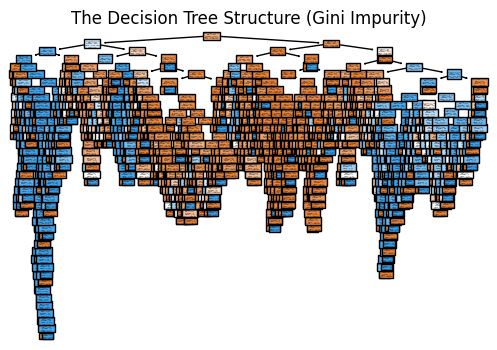

In [28]:
from sklearn.tree import plot_tree
# Visualize the decision tree trained with Gini impurity
plt.figure(figsize=(6, 4))
plot_tree(decision_tree_gini, feature_names=selected_features, class_names=['Employed', 'Left'], filled=True)
plt.title('The Decision Tree Structure (Gini Impurity)')
plt.show()

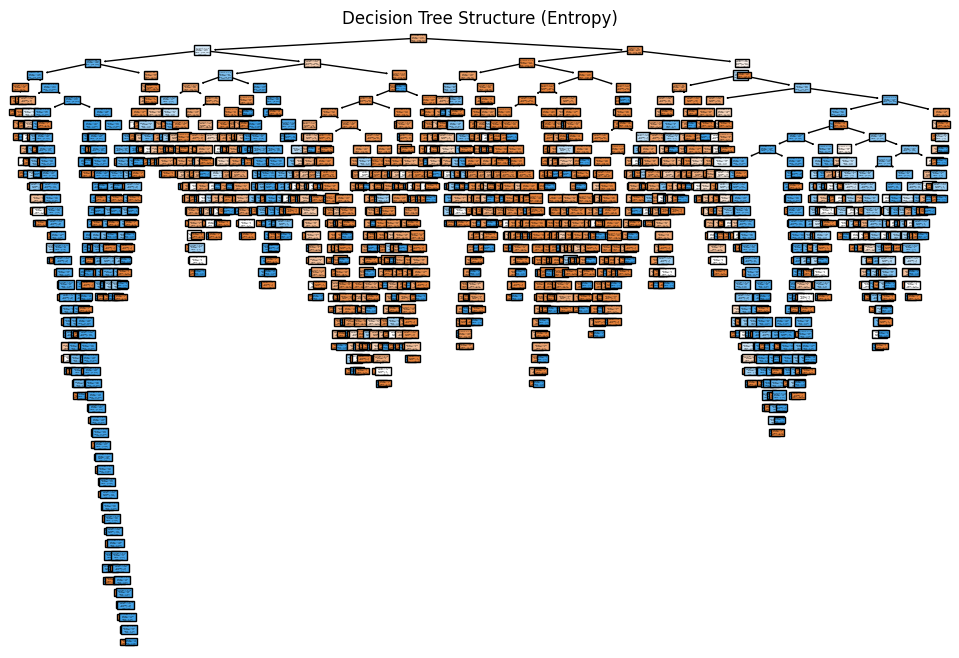

In [29]:
# Visualize the decision tree trained with Entropy
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_entropy, feature_names=selected_features, class_names=['Employed', 'Left'], filled=True)
plt.title('Decision Tree Structure (Entropy)')
plt.show()

In [30]:
# Get the depth of the trees
depth_gini = decision_tree_gini.get_depth()
depth_entropy = decision_tree_entropy.get_depth()

# Get feature importances
feature_importance_gini = decision_tree_gini.feature_importances_
feature_importance_entropy = decision_tree_entropy.feature_importances_

# Print depth and feature importance for both criteria
print('Depth of the Decision Tree (Gini impurity):', depth_gini)
print('Feature Importance (Gini impurity):', dict(zip(selected_features, feature_importance_gini)))

print('\nDepth of the Decision Tree (Entropy):', depth_entropy)
print('Feature Importance (Entropy):', dict(zip(selected_features, feature_importance_entropy)))

Depth of the Decision Tree (Gini impurity): 39
Feature Importance (Gini impurity): {'tenure': 0.22674571847594208, 'satisfaction': 0.5872269352037585, 'n_projects': 0.18602734632029944}

Depth of the Decision Tree (Entropy): 49
Feature Importance (Entropy): {'tenure': 0.26334361385190347, 'satisfaction': 0.5681945466078792, 'n_projects': 0.16846183954021726}


## **Apply Post-Pruning**

In [37]:
# Initialize lists to store accuracies for different pruning strategies
accuracy_min_samples_leaf = []
accuracy_max_depth = []
# Experiment with different minimum leaf sizes for pruning
min_samples_leaf_values = [1, 5, 10, 20, 30, 40, 50]

In [38]:
for min_samples_leaf in min_samples_leaf_values:
    # Train the decision tree classifier with the current min_samples_leaf
    decision_tree = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=min_samples_leaf)
    decision_tree.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = decision_tree.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_min_samples_leaf.append(accuracy)

# Experiment with different maximum depths for pruning
max_depth_values = [None, 5, 10, 15, 20, 25]

In [39]:
for max_depth in max_depth_values:
    # Train the decision tree classifier with the current max_depth
    decision_tree = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=max_depth)
    decision_tree.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = decision_tree.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_max_depth.append(accuracy)

In [40]:
# Print the accuracies for different pruning strategies
print('Accuracy for different min_samples_leaf values:', accuracy_min_samples_leaf)
print('Accuracy for different max_depth values:', accuracy_max_depth)

Accuracy for different min_samples_leaf values: [0.9361403508771929, 0.9501754385964912, 0.9547368421052631, 0.9582456140350877, 0.9498245614035088, 0.9498245614035088, 0.9452631578947368]
Accuracy for different max_depth values: [0.9361403508771929, 0.9533333333333334, 0.9557894736842105, 0.9445614035087719, 0.9364912280701755, 0.9361403508771929]


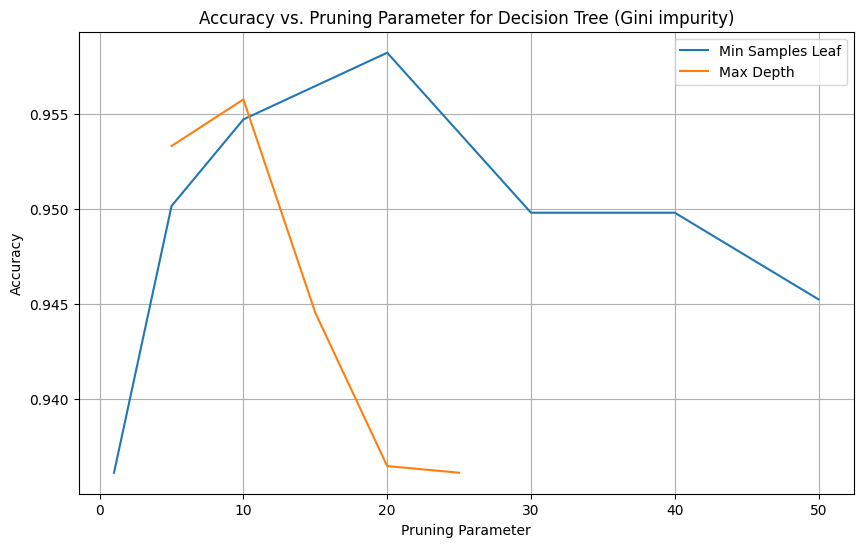

In [41]:
# Visualize the accuracies for different min_samples_leaf values and max_depth values
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, accuracy_min_samples_leaf, label='Min Samples Leaf')
plt.plot(max_depth_values, accuracy_max_depth, label='Max Depth')
plt.xlabel('Pruning Parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Pruning Parameter for Decision Tree (Gini impurity)')
plt.legend()
plt.grid(True)
plt.show()

# **3. Model Evaluation**

## **Pruned Decision Tree Model**

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize lists to store evaluation metrics for Gini impurity and entropy criteria
evaluation_metrics_gini = []
evaluation_metrics_entropy = []

In [43]:
# Evaluate the pruned decision tree models using different pruning strategies for Gini impurity
for min_samples_leaf in min_samples_leaf_values:
    decision_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=min_samples_leaf)
    decision_tree_gini.fit(X_train, y_train)
    y_pred_gini = decision_tree_gini.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_gini)
    precision = precision_score(y_test, y_pred_gini, average='weighted')
    recall = recall_score(y_test, y_pred_gini, average='weighted')
    f1 = f1_score(y_test, y_pred_gini, average='weighted')

    evaluation_metrics_gini.append((accuracy, precision, recall, f1))

In [44]:
# Evaluate the pruned decision tree models using different pruning strategies for entropy
for max_depth in max_depth_values:
    decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=max_depth)
    decision_tree_entropy.fit(X_train, y_train)
    y_pred_entropy = decision_tree_entropy.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_entropy)
    precision = precision_score(y_test, y_pred_entropy, average='weighted')
    recall = recall_score(y_test, y_pred_entropy, average='weighted')
    f1 = f1_score(y_test, y_pred_entropy, average='weighted')

    evaluation_metrics_entropy.append((accuracy, precision, recall, f1))

In [45]:
# Print evaluation metrics for different pruning strategies using Gini impurity
print('Evaluation Metrics for Gini impurity:')
for i, min_samples_leaf in enumerate(min_samples_leaf_values):
    print(f'\nMin Samples Leaf = {min_samples_leaf}')
    print('Accuracy:', evaluation_metrics_gini[i][0])
    print('Precision:', evaluation_metrics_gini[i][1])
    print('Recall:', evaluation_metrics_gini[i][2])
    print('F1 Score:', evaluation_metrics_gini[i][3])

Evaluation Metrics for Gini impurity:

Min Samples Leaf = 1
Accuracy: 0.9361403508771929
Precision: 0.9371924093808807
Recall: 0.9361403508771929
F1 Score: 0.9365654508035449

Min Samples Leaf = 5
Accuracy: 0.9501754385964912
Precision: 0.9499409778094254
Recall: 0.9501754385964912
F1 Score: 0.9500423320652388

Min Samples Leaf = 10
Accuracy: 0.9547368421052631
Precision: 0.954545371478401
Recall: 0.9547368421052631
F1 Score: 0.9546281422747979

Min Samples Leaf = 20
Accuracy: 0.9582456140350877
Precision: 0.9581427520069712
Recall: 0.9582456140350877
F1 Score: 0.9581901697210183

Min Samples Leaf = 30
Accuracy: 0.9498245614035088
Precision: 0.9497476350255978
Recall: 0.9498245614035088
F1 Score: 0.9497846800789259

Min Samples Leaf = 40
Accuracy: 0.9498245614035088
Precision: 0.9496992024968707
Recall: 0.9498245614035088
F1 Score: 0.9497579350429044

Min Samples Leaf = 50
Accuracy: 0.9452631578947368
Precision: 0.9450498259623286
Recall: 0.9452631578947368
F1 Score: 0.9451464508831876

In [46]:
# Print evaluation metrics for different pruning strategies using entropy
print('\nEvaluation Metrics for Entropy:')
for i, max_depth in enumerate(max_depth_values):
    print(f'\nMax Depth = {max_depth}')
    print('Accuracy:', evaluation_metrics_entropy[i][0])
    print('Precision:', evaluation_metrics_entropy[i][1])
    print('Recall:', evaluation_metrics_entropy[i][2])
    print('F1 Score:', evaluation_metrics_entropy[i][3])


Evaluation Metrics for Entropy:

Max Depth = None
Accuracy: 0.9343859649122807
Precision: 0.9356064850128543
Recall: 0.9343859649122807
F1 Score: 0.9348714228656048

Max Depth = 5
Accuracy: 0.9529824561403509
Precision: 0.9534519661024221
Recall: 0.9529824561403509
F1 Score: 0.953177346311727

Max Depth = 10
Accuracy: 0.9568421052631579
Precision: 0.9568196092139856
Recall: 0.9568421052631579
F1 Score: 0.9568306977763806

Max Depth = 15
Accuracy: 0.9417543859649122
Precision: 0.9422377092155677
Recall: 0.9417543859649122
F1 Score: 0.9419661371935082

Max Depth = 20
Accuracy: 0.9375438596491228
Precision: 0.9387673479115147
Recall: 0.9375438596491228
F1 Score: 0.938021325134745

Max Depth = 25
Accuracy: 0.9357894736842105
Precision: 0.9370882810453629
Recall: 0.9357894736842105
F1 Score: 0.9362961169647558


## **Diverging Bar Chart**

In [47]:
from sklearn.metrics import confusion_matrix

# Initialize lists to store confusion matrices for Gini impurity and entropy criteria
confusion_matrices_gini = []
confusion_matrices_entropy = []

In [48]:
# Calculate confusion matrices for different pruning strategies using Gini impurity
for min_samples_leaf in min_samples_leaf_values:
    decision_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=min_samples_leaf)
    decision_tree_gini.fit(X_train, y_train)
    y_pred_gini = decision_tree_gini.predict(X_test)

    confusion_matrix_gini = confusion_matrix(y_test, y_pred_gini)
    confusion_matrices_gini.append(confusion_matrix_gini)

In [49]:
# Calculate confusion matrices for different pruning strategies using entropy
for max_depth in max_depth_values:
    decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=max_depth)
    decision_tree_entropy.fit(X_train, y_train)
    y_pred_entropy = decision_tree_entropy.predict(X_test)

    confusion_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
    confusion_matrices_entropy.append(confusion_matrix_entropy)

In [50]:
# Plot the diverging bar chart for confusion matrix
def plot_confusion_matrix(confusion_matrix, title, ax):
    im = ax.imshow(confusion_matrix, cmap='coolwarm', vmin=0, vmax=confusion_matrix.sum(axis=1).max())
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color='black', fontsize=14)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Employed', 'Left'])
    ax.set_yticklabels(['Employed', 'Left'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

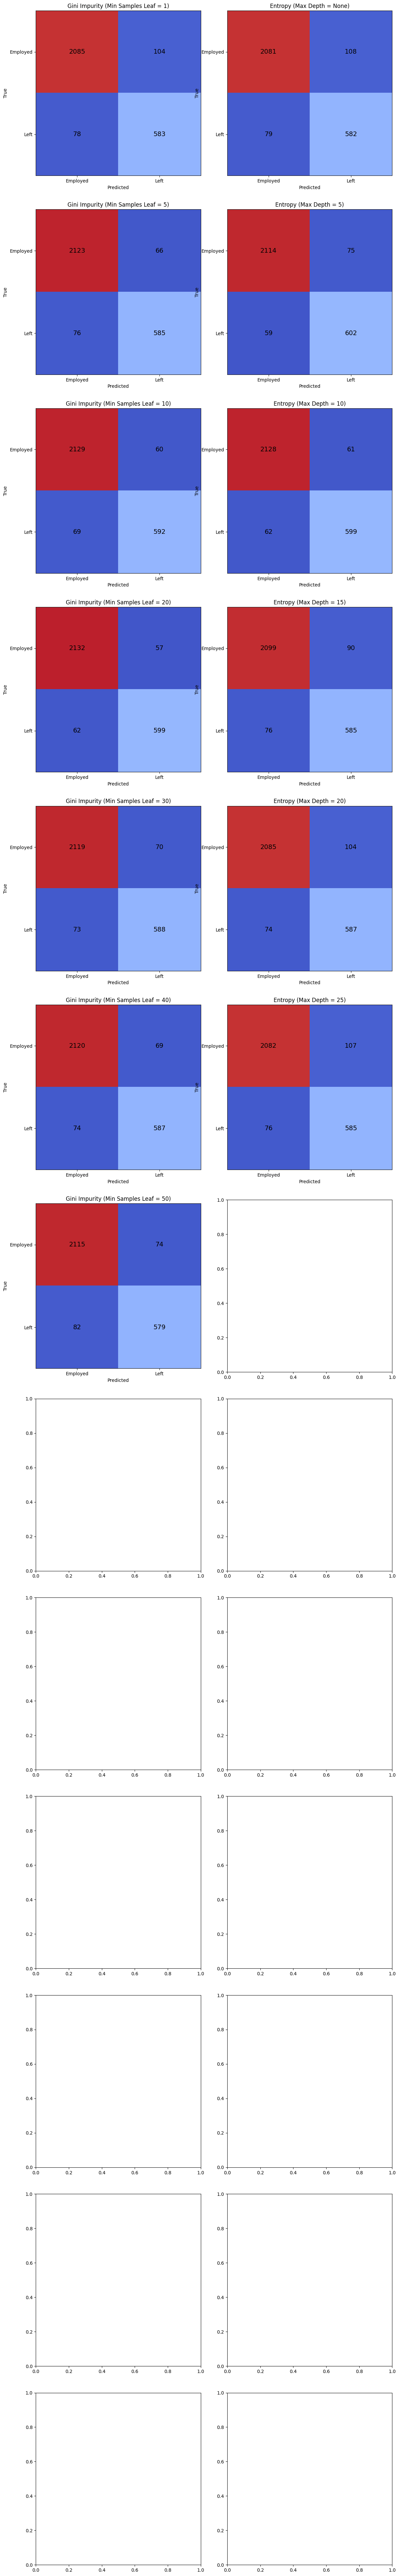

In [51]:
# Create the diverging bar chart
fig, axes = plt.subplots(len(min_samples_leaf_values) + len(max_depth_values), 2, figsize=(12, 6 * (len(min_samples_leaf_values) + len(max_depth_values))))

# Plot confusion matrices for Gini impurity
for i, min_samples_leaf in enumerate(min_samples_leaf_values):
    plot_confusion_matrix(confusion_matrices_gini[i], f'Gini Impurity (Min Samples Leaf = {min_samples_leaf})', axes[i, 0])

# Plot confusion matrices for entropy
for i, max_depth in enumerate(max_depth_values):
    plot_confusion_matrix(confusion_matrices_entropy[i], f'Entropy (Max Depth = {max_depth})', axes[i, 1])

plt.tight_layout()
plt.show()


## **4. Feature Importance Visualization**

In [52]:
# Initialize lists to store feature importances for Gini impurity and entropy criteria
feature_importances_gini = []
feature_importances_entropy = []

In [53]:
# Calculate feature importances for different pruning strategies using Gini impurity
for min_samples_leaf in min_samples_leaf_values:
    decision_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=min_samples_leaf)
    decision_tree_gini.fit(X_train, y_train)

    feature_importance_gini = decision_tree_gini.feature_importances_
    feature_importances_gini.append(feature_importance_gini)

In [54]:
# Calculate feature importances for different pruning strategies using entropy
for max_depth in max_depth_values:
    decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=max_depth)
    decision_tree_entropy.fit(X_train, y_train)

    feature_importance_entropy = decision_tree_entropy.feature_importances_
    feature_importances_entropy.append(feature_importance_entropy)

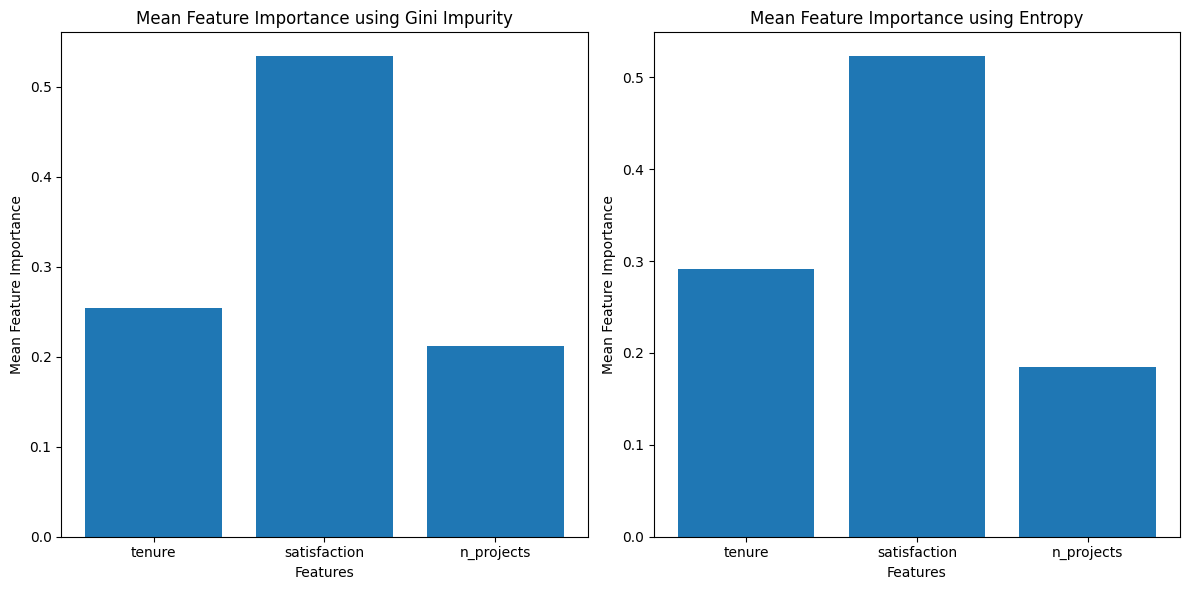

In [60]:
import numpy as np
# Calculate mean feature importances for Gini impurity and entropy criteria
mean_feature_importances_gini = np.mean(feature_importances_gini, axis=0)
mean_feature_importances_entropy = np.mean(feature_importances_entropy, axis=0)

# Plot the bar chart for mean feature importances
def plot_mean_feature_importances(mean_feature_importances, criterion, ax):
    ax.bar(selected_features, mean_feature_importances)
    ax.set_xlabel('Features')
    ax.set_ylabel('Mean Feature Importance')
    ax.set_title(f'Mean Feature Importance using {criterion}')

# Create the bar chart for mean feature importances
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot mean feature importances for Gini impurity
plot_mean_feature_importances(mean_feature_importances_gini, 'Gini Impurity', axes[0])

# Plot mean feature importances for entropy
plot_mean_feature_importances(mean_feature_importances_entropy, 'Entropy', axes[1])

plt.tight_layout()
plt.show()
